# Mini-Project:

### Problem Formulation:
Dataset Chosen: [Mutliple Disease Prediction](https://www.kaggle.com/datasets/ehababoelnaga/multiple-disease-prediction)
Problem Statement: How might we detect various types diseases using blood work results?

As blood work is one of the most common test done in the medical field. Could we develop a predictive model that can identify the likelihood of various diseases based on the provided blook work results provided by the lab?

A sucuessful high confience model may be able to significantly impact patient care by allowing precise and early diagnostics, improving treatment outcomes and optimising resource allocation.

In the likely chance that the model may not have an high confidence in predicting the diseases. It could serve as a flag of sorts; placing more emphasis on certain few patients that may encounter such.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/work/Blood_samples_dataset_balanced_2(f).csv'
pre_data = pd.read_csv(file_path)

# Display the first few rows and some general information about the dataset
data_info = pre_data.info()
data_head = pre_data.head()
data_description = pre_data.describe()

data_info, data_head, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

(None,
     Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
 0  0.739597     0.650198    0.713631   0.868491           0.687433   
 1  0.121786     0.023058    0.944893   0.905372           0.507711   
 2  0.452539     0.116135    0.544560   0.400640           0.294538   
 3  0.136609     0.015605    0.419957   0.191487           0.081168   
 4  0.176737     0.752220    0.971779   0.785286           0.443880   
 
    Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
 0         0.529895    0.290006                 0.631045   
 1         0.403033    0.164216                 0.307553   
 2         0.382021    0.625267                 0.295122   
 3         0.166214    0.073293                 0.668719   
 4         0.439851    0.894991                 0.442159   
 
    Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
 0                     0.001328                                   0.795829   
 1                     0.207938                

### Visualisation of data to detect any outliers

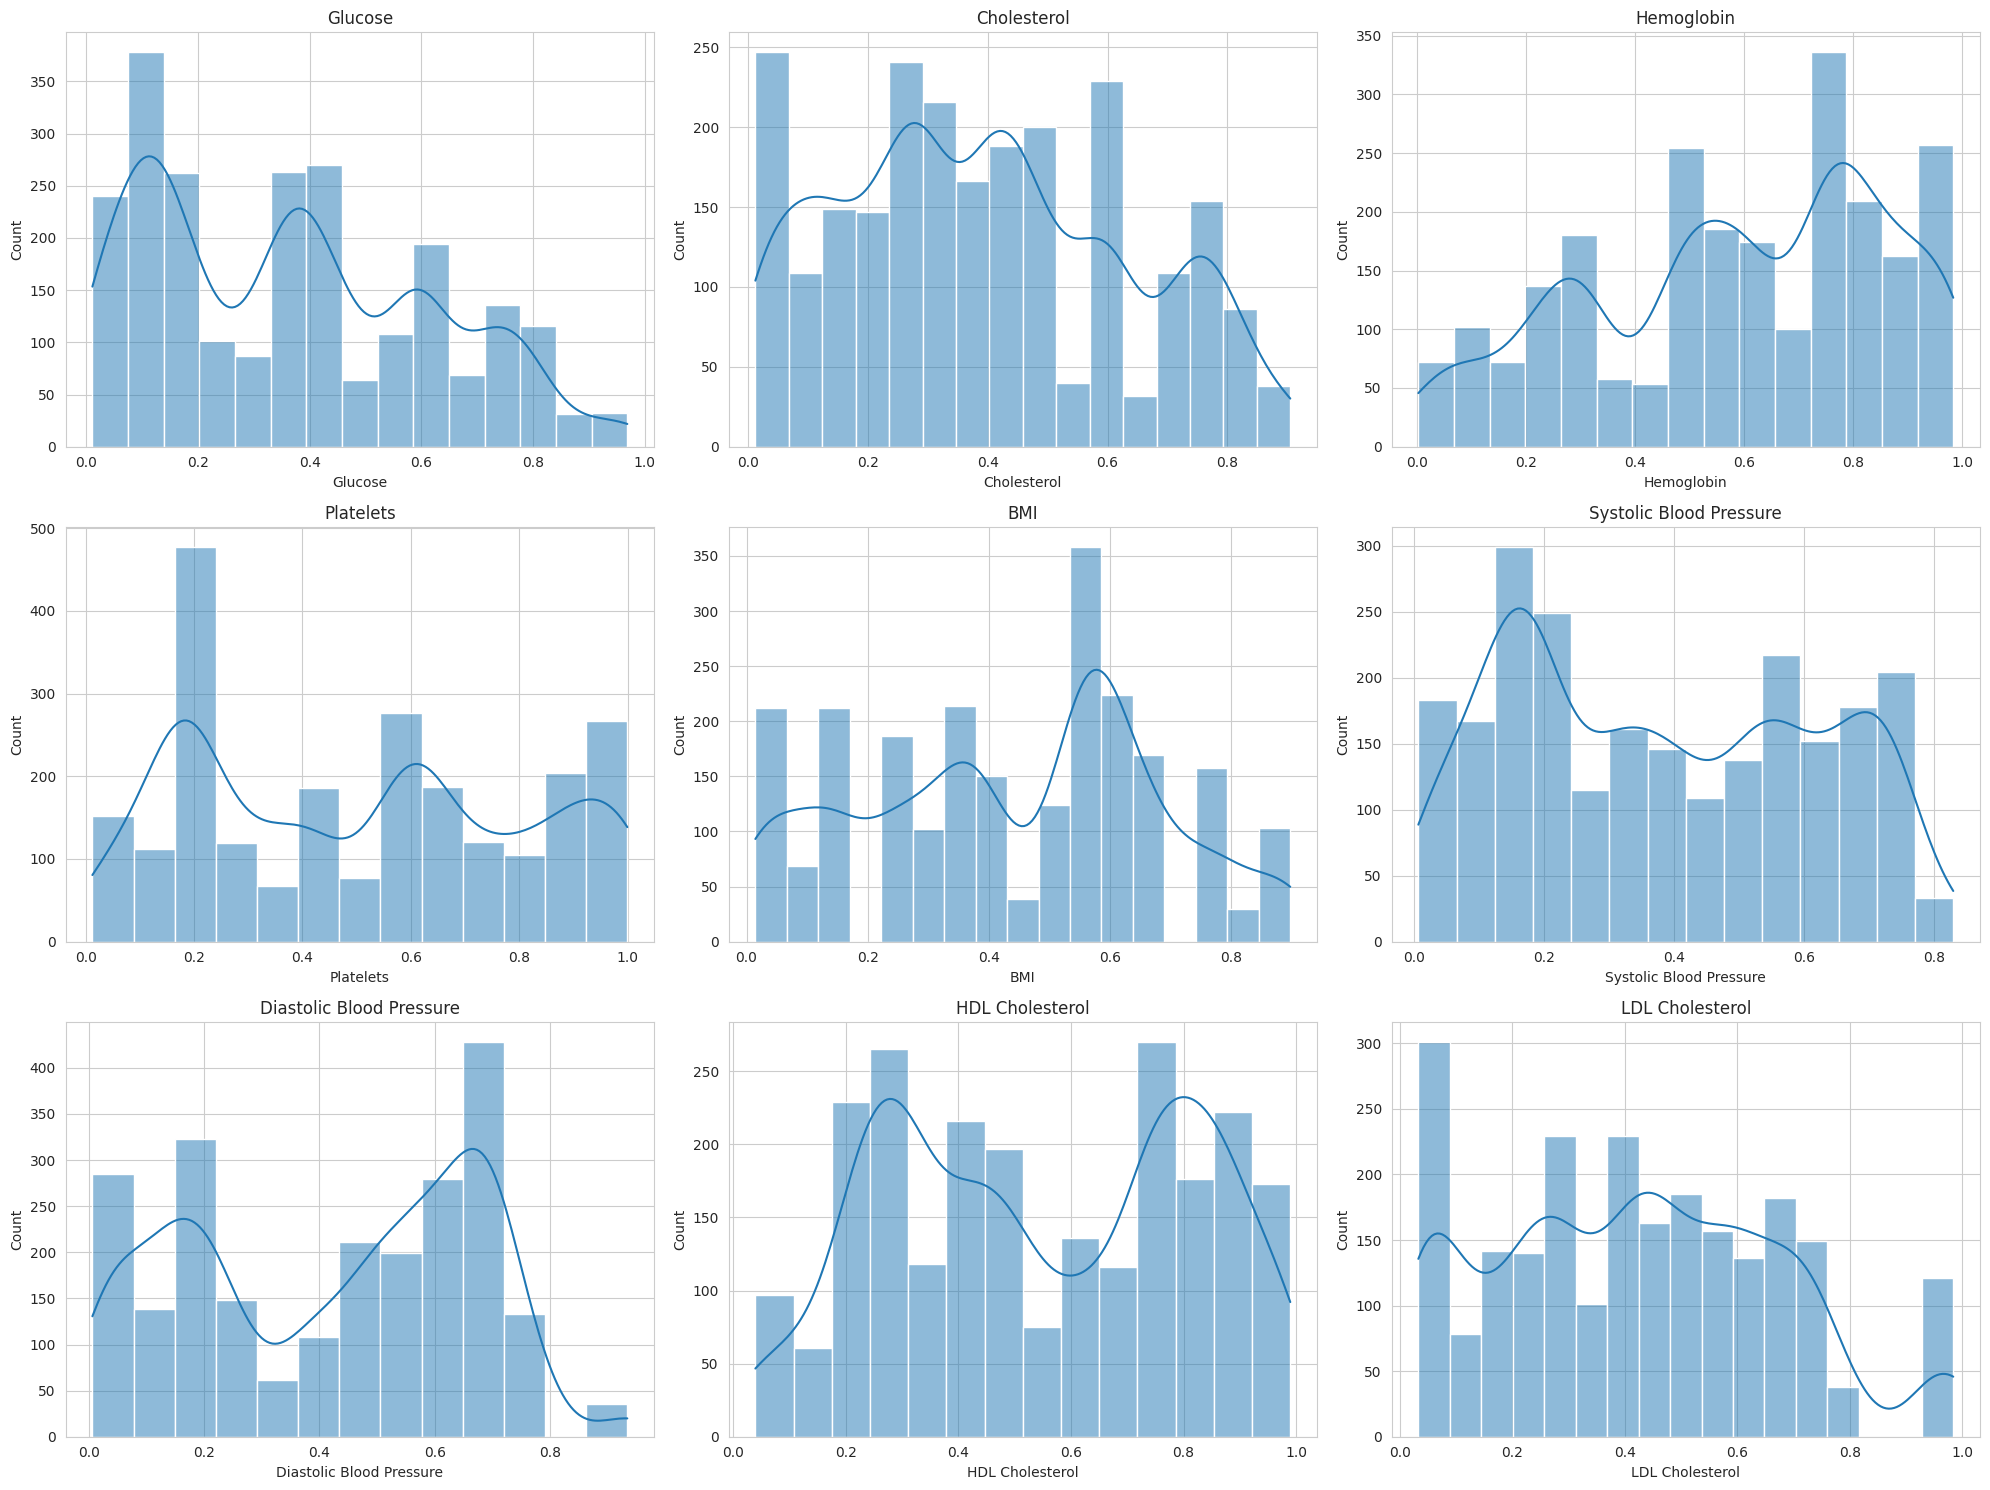

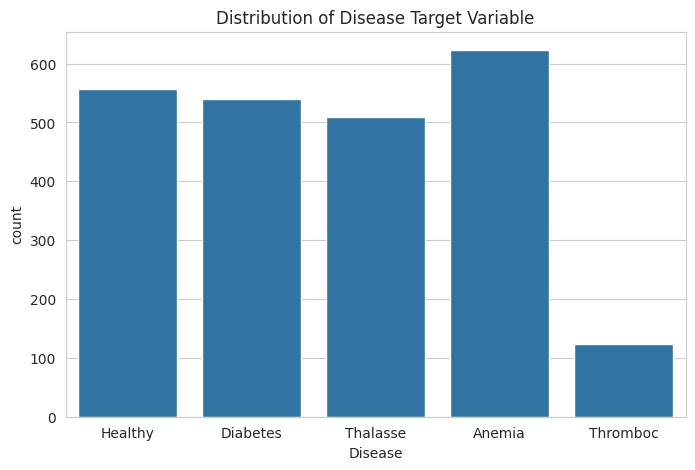

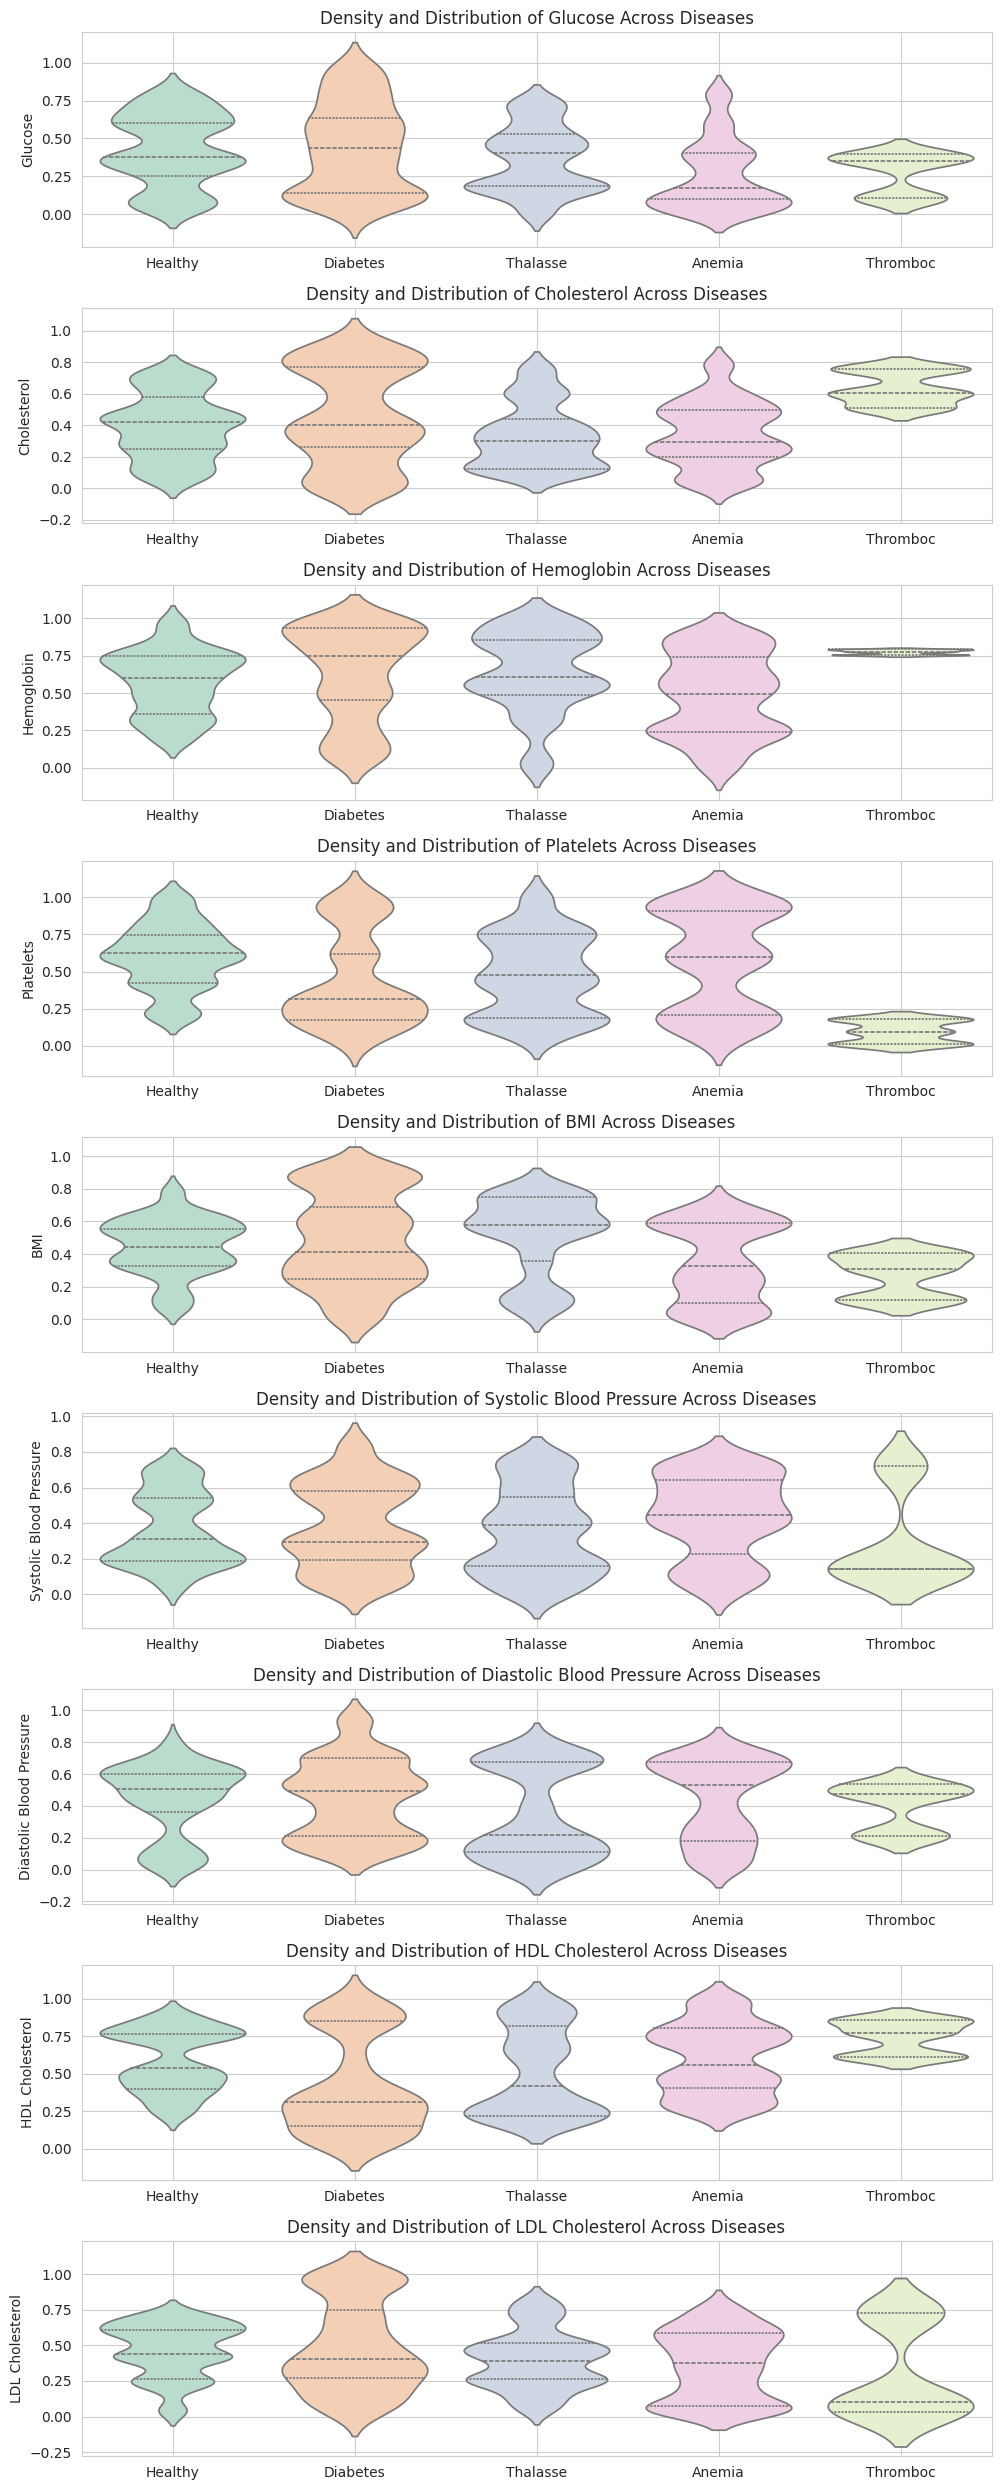

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
features_to_plot = ['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets', 'BMI', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'HDL Cholesterol', 'LDL Cholesterol']
for i, col in enumerate(features_to_plot):
    sns.histplot(pre_data[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)

plt.tight_layout()

# Check the balance of the target variable 'Disease'
plt.figure(figsize=(8, 5))
sns.countplot(x=pre_data['Disease'])
plt.title('Distribution of Disease Target Variable')

plt.show()

#violin plot
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 25))
for i, var in enumerate(features_to_plot):
    sns.violinplot(x='Disease', y=var, data=pre_data, ax=axes[i], palette='Pastel2', inner='quartile')
    axes[i].set_title(f'Density and Distribution of {var} Across Diseases')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

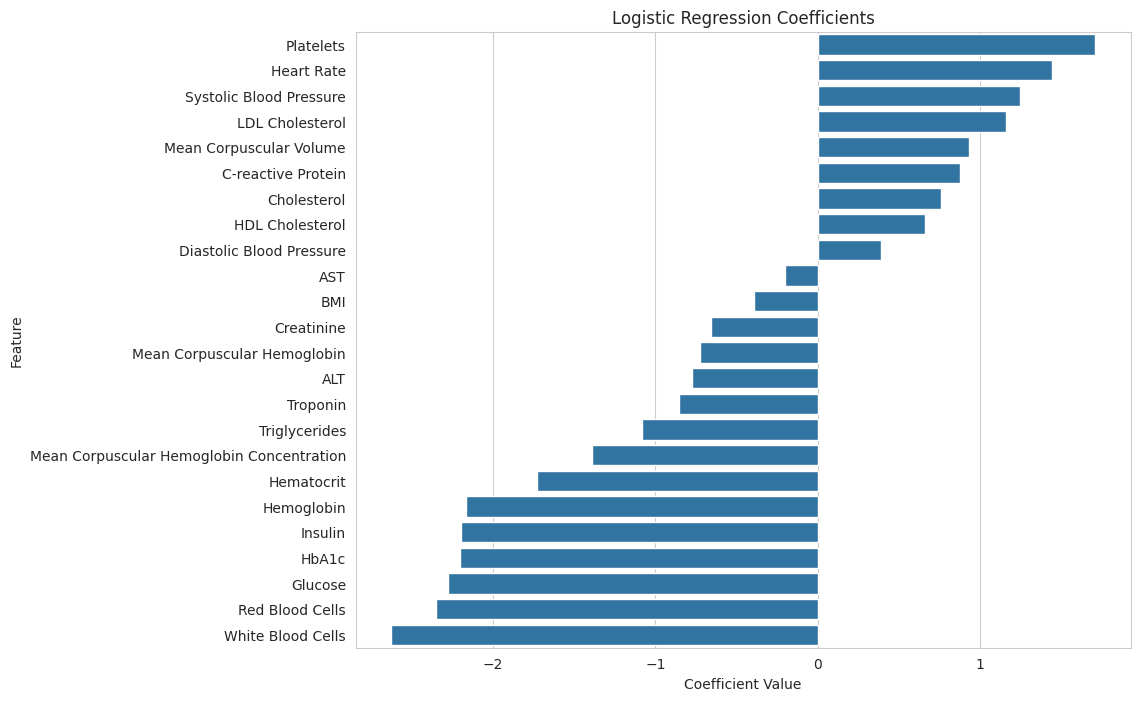

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error

# Separate features and target variable
X = pre_data.drop('Disease', axis=1)
y = pre_data['Disease']

# Standardizing the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=5000, random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

#Predict on the train set
y_train_pred = log_reg.predict(X_train)

# Predict on the test set
y_test_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

# Extract coefficients from the Logistic Regression model
coefficients = log_reg.coef_[0]
features = X.columns

# Create a DataFrame for easier visualization
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)

# Coefficient Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Using Logistic Regression, it would seem that **Diastolic Blood Pressure**, **AST (Aspartate Aminotransferase)** and **BMI (Body Mass Index)** does not impact the likelihood/unlikelihood of diseases as much as the other variables due to the low coefficent value.

As a result, we will be leaving them out in order to cut down the number of variable that the model will be trained on.

In [ ]:
# Drop Diastolic BP, AST and BMI
c_data = pre_data.drop(['Diastolic Blood Pressure', 'AST', 'BMI'], axis=1)
c_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.841412,0.153350,0.794008,0.094970,Thalasse


## Exploring Machine Learning Models.

For this classification problem, we will be using Gradient Boosting Classifier, Decision Trees, Random Forest, and Support Vector Machines.

They will be trained with an 80/20 Train/Test and a test will be conducted at the end of this model implementation to get their accuracy score when testing against the test samples within the **same** dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Disease' is the target variable
X = c_data.drop('Disease', axis=1)  # Features
y = c_data['Disease']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models ={
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and evaluate the models
for name, model in models.items():
    # Check if model requires scaled features
    is_scaled = name in ['Gradient Boosting', 'Support Vector Machine']
    
    # Train the model with the appropriate feature set
    model.fit(X_train_scaled if is_scaled else X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled if is_scaled else X_test)
    
    # Evaluate the model
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

Model: Gradient Boosting
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       134
    Diabetes       1.00      1.00      1.00       112
     Healthy       1.00      1.00      1.00       102
    Thalasse       1.00      1.00      1.00       103
    Thromboc       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

Accuracy: 1.0
Model: Decision Tree
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       134
    Diabetes       1.00      1.00      1.00       112
     Healthy       1.00      1.00      1.00       102
    Thalasse       1.00      1.00      1.00       103
    Thromboc       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg     

### Results synthesis:
From the above accuracy, the trained model has a 100% accuracy rate against the 20% test sample size in the same dataset (following a 80/20 spilt).

A test dataset that is also provided by the same kaggle source will be used to test the 'real-world' case for these models.

In [ ]:
# Load the test dataset
file_path = '/work/blood_samples_dataset_test.csv'
test_data = pd.read_csv(file_path)

# If the new dataset contains 'Diastolic Blood Pressure', 'AST', 'BMI', remove them
test_data = test_data.drop(['Diastolic Blood Pressure', 'AST', 'BMI'], axis=1, errors='ignore')

# Separate the features and the target from the test dataset
X_new_test = test_data.drop('Disease', axis=1)
y_new_test = test_data['Disease']

# Scale the features using the already fitted scaler from the original data
X_new_test_scaled = scaler.transform(X_new_test)

# Make predictions with each of the trained models
predictions = {}
for name, model in models.items():
    is_scaled = name in ['Gradient Boosting', 'Support Vector Machine']
    predictions[name] = model.predict(X_new_test_scaled if is_scaled else X_new_test)

# Evaluate the predictions made by each model
for name, y_pred in predictions.items():
    print(f"Evaluation for {name}:")
    print(classification_report(y_new_test, y_pred))
    print("Accuracy:", accuracy_score(y_new_test, y_pred))
    print("\n")

Evaluation for Gradient Boosting:
              precision    recall  f1-score   support

      Anemia       0.36      0.58      0.44        84
    Diabetes       0.68      0.48      0.56       294
     Healthy       0.05      0.60      0.10         5
    Heart Di       0.00      0.00      0.00        39
    Thalasse       0.33      0.44      0.38        48
    Thromboc       0.17      0.25      0.20        16

    accuracy                           0.45       486
   macro avg       0.27      0.39      0.28       486
weighted avg       0.51      0.45      0.46       486

Accuracy: 0.44650205761316875


Evaluation for Decision Tree:
              precision    recall  f1-score   support

      Anemia       0.32      0.57      0.41        84
    Diabetes       0.62      0.27      0.38       294
     Healthy       0.04      1.00      0.08         5
    Heart Di       0.00      0.00      0.00        39
    Thalasse       0.29      0.48      0.36        48
    Thromboc       0.33      0.19   

### Insights:
**Support Vector Machine** performed the best in terms of overall accuracy (46.91%), but the performance is still quite modest.
**Gradient Boosting** showed the next best accuracy at (44.65%), which is similar but slightly lower than the SVM.
**Random Forest** and **Decision Tree** both struggled, especially the Decision Tree, which had the lowest accuracy at (32.51%).



### Improving the Model:
We noticed that each model predicts each variable differently with varying accuracy.
Applying advanced ensemble techniques such as stacking, we can combine the predictions from multiple models and make a final prediction, possibly improving overall performance.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the stacker model
stacker = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=LogisticRegression()
)

# Train the stacker model
stacker.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = stacker.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       134
    Diabetes       1.00      1.00      1.00       112
     Healthy       1.00      1.00      1.00       102
    Thalasse       1.00      1.00      1.00       103
    Thromboc       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



In [ ]:
# Apply the same scaling to the test dataset
X_new_test_scaled = scaler.transform(X_new_test)

# Make predictions with the trained stacker model
y_pred = stacker.predict(X_new_test_scaled)

# Evaluate the predictions made by the stacker model on the untouched test dataset
print("Classification Report:")
print(classification_report(y_new_test, y_pred))
print("Accuracy:", accuracy_score(y_new_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      Anemia       0.40      0.63      0.49        84
    Diabetes       0.70      0.53      0.60       294
     Healthy       0.07      1.00      0.13         5
    Heart Di       0.00      0.00      0.00        39
    Thalasse       0.35      0.40      0.37        48
    Thromboc       0.43      0.19      0.26        16

    accuracy                           0.48       486
   macro avg       0.32      0.46      0.31       486
weighted avg       0.54      0.48      0.50       486

Accuracy: 0.4835390946502058


### Analysis
Comparing the best model (SVM) with the stacked model...
Support Vector Machine: precision    recall  f1-score   support

      Anemia       0.38      0.37      0.38        84
    Diabetes       0.68      0.62      0.65       294
     Healthy       0.04      0.60      0.07         5
    Heart Di       0.00      0.00      0.00        39
    Thalasse       0.19      0.25      0.22        48
    Thromboc       0.00      0.00      0.00        16
    Accuracy: 0.4691358024691358


Stacked Model: precision    recall  f1-score   support


      Anemia       0.40      0.63      0.49        84
    Diabetes       0.70      0.53      0.60       294
     Healthy       0.07      1.00      0.13         5
    Heart Di       0.00      0.00      0.00        39
    Thalasse       0.35      0.40      0.37        48
    Thromboc       0.43      0.19      0.26        16
    Accuracy: 0.4835390946502058

We can see a sizable improvement with each disease prediction and and overall increase by ~2%.

### Conclusion
Although the accuracy of the model may not be high overall, with the usage of the stacked model, the models could be used as a sidekick for medical professionals to highlight possible diseases (**Diabetes** (Moderate/High Confidence), **Anemia/Thalasse/Thoromboc** (Low/Moderate Confidence)).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc034988-5391-410e-9fff-a6400516276c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>